In [22]:
from Layer import Layer
from NeuralNetwork import NeuralNetwork

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from genieclust.plots import plot_scatter

def load_data_classification(path, plot=False):
    raw = pd.read_csv(path)
    set_ = np.array(raw.loc[:, ["x", "y"]])
    labels_ = np.array(raw.cls)
    if plot:
        plot_scatter(set_, np.array(labels_))
        plt.show()
    return set_, labels_.reshape(-1, 1)

def plot_results(network, set_):
    assert isinstance(network, NeuralNetwork), isinstance(set_, np.ndarray)
    plot_scatter(set_, network.forward_pass(set_).argmax(axis=1))

def train_wrapper(network, train_set, train_labels, test_x=None, test_y=None, epochs=1, learning_rate=1e-2, verbose=True):
    try:
        train_loss, test_loss, _ = network.train(train_set, train_labels, test_set, test_labels, epochs=epochs, learning_rate=learning_rate, verbose=verbose)
        
        
        _, (ax1, ax2) = plt.subplots(ncols=2, sharey=False, figsize=(10, 3))
        sns.scatterplot(np.arange(epochs), train_loss, ax=ax1).set_title("Błąd na treningowym")
        
        sns.scatterplot(np.arange(epochs), test_loss, ax=ax2).set_title("Błąd na testowym")
        plt.show()
        
        plot_results(network, train_set,)
        
    except KeyboardInterrupt:
        pass

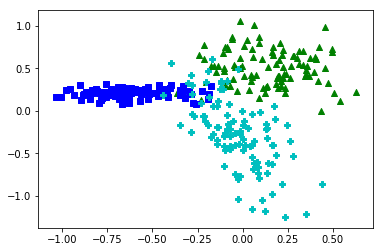

In [24]:
train_set, train_labels = load_data_classification("MGU_projekt1/Classification/data.three_gauss.train.100.csv", plot=True)
test_set, test_labels = load_data_classification("MGU_projekt1/Classification/data.three_gauss.test.100.csv")

999

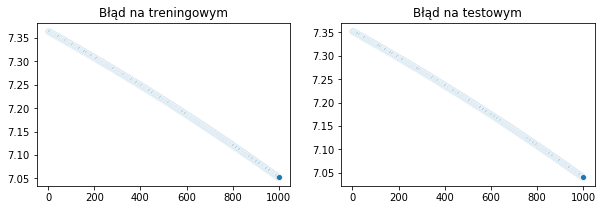

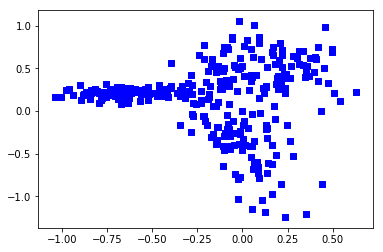

In [74]:
np.random.seed(58)
nn = NeuralNetwork("cross_entropy", 0)

nn.add(Layer(1, 2, "relu"))
nn.add(Layer(2, 1, "sigmoid"))
nn.add(Layer(3, 2, "softmax"))

train_wrapper(nn, train_set, train_labels, test_set, test_labels, epochs=1000, learning_rate=1e-3)

999

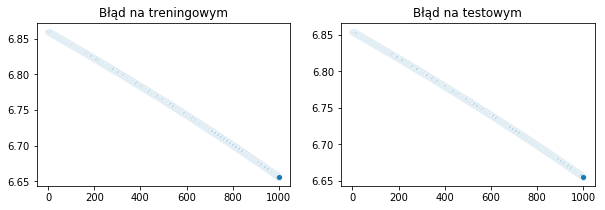

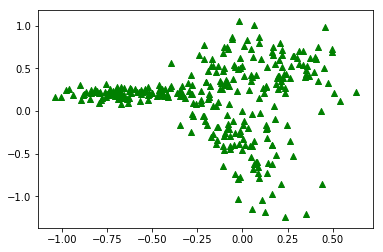

In [75]:
np.random.seed(58)
nn = NeuralNetwork("cross_entropy", 0)

nn.add(Layer(1, 2, "relu"))
nn.add(Layer(3, 1, "sigmoid"))
nn.add(Layer(3, 3, "softmax"))

train_wrapper(nn, train_set, train_labels, test_set, test_labels, epochs=1000, learning_rate=1e-3)

999

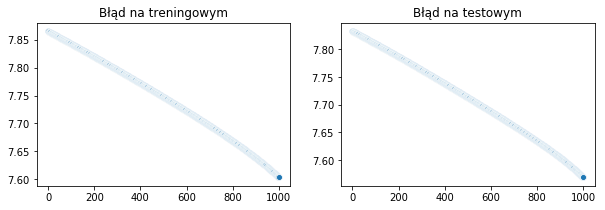

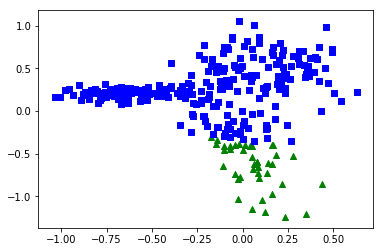

In [76]:
np.random.seed(58)
nn = NeuralNetwork("cross_entropy", 0)

nn.add(Layer(1, 2, "relu"))
nn.add(Layer(5, 1, "sigmoid"))
nn.add(Layer(3, 5, "softmax"))

train_wrapper(nn, train_set, train_labels, test_set, test_labels, epochs=1000, learning_rate=1e-3)

999

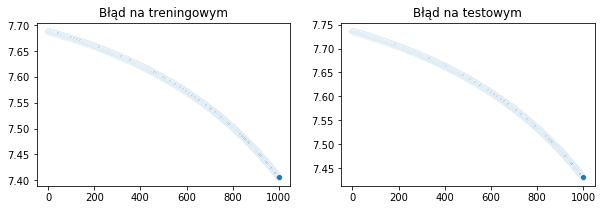

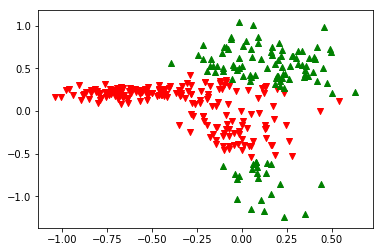

In [78]:
np.random.seed(58)
nn = NeuralNetwork("cross_entropy", 0)

nn.add(Layer(1, 2, "relu"))
nn.add(Layer(7, 1, "sigmoid"))
nn.add(Layer(3, 7, "softmax"))

train_wrapper(nn, train_set, train_labels, test_set, test_labels, epochs=1000, learning_rate=1e-3)

299

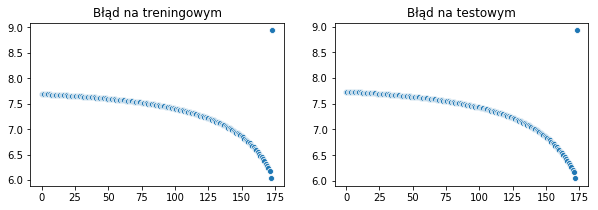

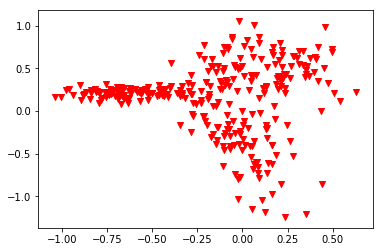

In [80]:
np.random.seed(58)
nn = NeuralNetwork("cross_entropy", 0)

nn.add(Layer(1, 2, "relu"))
nn.add(Layer(7, 1, "sigmoid"))
nn.add(Layer(3, 7, "softmax"))

train_wrapper(nn, train_set, train_labels, test_set, test_labels, epochs=300, learning_rate=1e-2)

303

/media/tmakowski/Dane/studia/mgu/repo-MGU2019/NeuralNetwork.py:83: RuntimeWarning: invalid value encountered in multiply
  semi_grad = np.dot(self.layers[-i+1].W.reshape(self.layers[-i+1].W.shape[1], self.layers[-i+1].W.shape[0]), semi_grad) * deriv


499

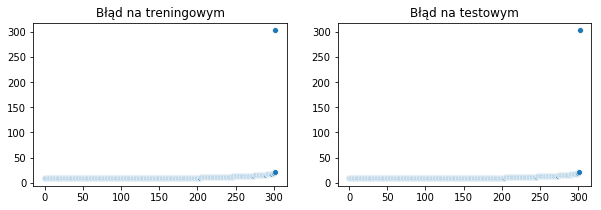

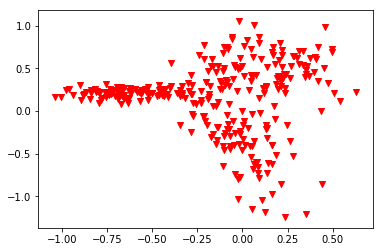

In [90]:
np.random.seed(58)
nn = NeuralNetwork("cross_entropy", 0)

nn.add(Layer(1, 2, "relu"))
nn.add(Layer(7, 1, "sigmoid"))
nn.add(Layer(1, 7, "relu"))
nn.add(Layer(3, 1, "softmax"))

train_wrapper(nn, train_set, train_labels, test_set, test_labels, epochs=500, learning_rate=1e-2)

499

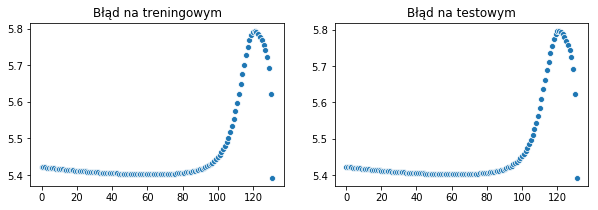

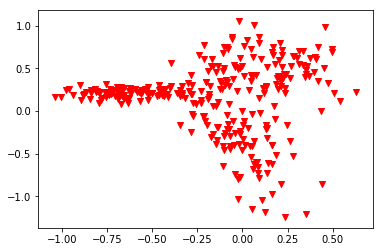

In [91]:
np.random.seed(58)
nn = NeuralNetwork("cross_entropy", 0)

nn.add(Layer(1, 2, "relu"))
nn.add(Layer(2, 1, "relu"))
nn.add(Layer(2, 2, "sigmoid"))
nn.add(Layer(3, 2, "softmax"))

train_wrapper(nn, train_set, train_labels, test_set, test_labels, epochs=500, learning_rate=1e-2)

999

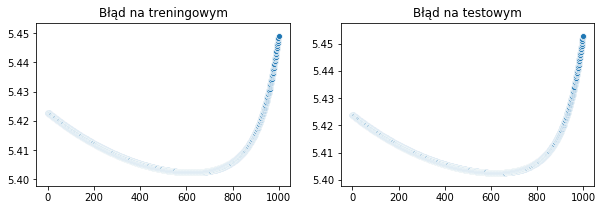

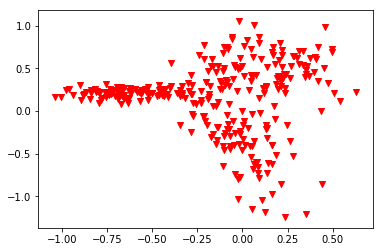

In [92]:
np.random.seed(58)
nn = NeuralNetwork("cross_entropy", 0)

nn.add(Layer(1, 2, "relu"))
nn.add(Layer(2, 1, "relu"))
nn.add(Layer(2, 2, "sigmoid"))
nn.add(Layer(3, 2, "softmax"))

train_wrapper(nn, train_set, train_labels, test_set, test_labels, epochs=1000, learning_rate=1e-3)

999

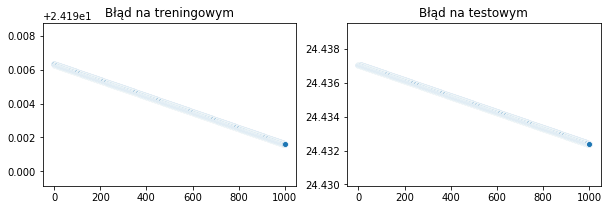

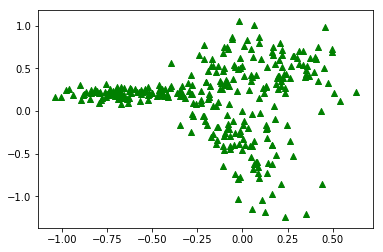

In [93]:
np.random.seed(58)
nn = NeuralNetwork("cross_entropy", 0)

nn.add(Layer(1, 2, "relu"))
nn.add(Layer(10, 1, "sigmoid"))
nn.add(Layer(1, 10, "relu"))
nn.add(Layer(3, 1, "softmax"))

train_wrapper(nn, train_set, train_labels, test_set, test_labels, epochs=1000, learning_rate=1e-3)

999

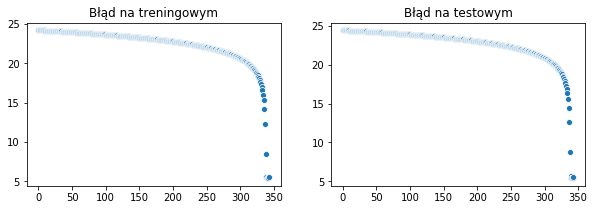

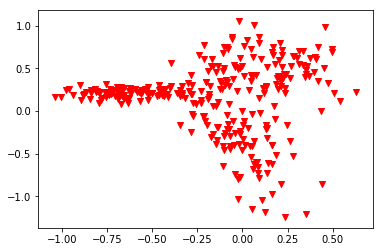

In [96]:
np.random.seed(58)
nn = NeuralNetwork("cross_entropy", 0)

nn.add(Layer(1, 2, "relu"))
nn.add(Layer(10, 1, "sigmoid"))
nn.add(Layer(1, 10, "relu"))
nn.add(Layer(3, 1, "softmax"))

train_wrapper(nn, train_set, train_labels, test_set, test_labels, epochs=1000, learning_rate=1e-0)